In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize
import datetime

In [2]:
# Read data from the file to a dataframe
df = pd.read_csv("Steel Futures Historical Data.csv")
print(df)

            Date      Price       Open       High        Low   Vol. Change %
0     12/26/2023  43,720.00  43,840.00  43,840.00  43,610.00  0.33K   -1.11%
1     12/22/2023  44,210.00  44,080.00  44,250.00  44,000.00  0.67K    0.23%
2     12/21/2023  44,110.00  44,110.00  44,160.00  44,080.00  0.31K    0.25%
3     12/20/2023  44,000.00  44,000.00  44,000.00  44,000.00  0.01K    0.00%
4     12/19/2023  44,000.00  44,000.00  44,000.00  44,000.00  0.02K   -0.95%
...          ...        ...        ...        ...        ...    ...      ...
1381  01/07/2015  31,700.00  31,700.00  31,700.00  31,700.00    NaN   -0.35%
1382  01/06/2015  31,810.00  31,810.00  31,810.00  31,810.00    NaN   -0.50%
1383  01/05/2015  31,970.00  31,970.00  31,970.00  31,970.00    NaN   -0.22%
1384  01/02/2015  32,040.00  32,040.00  32,040.00  32,040.00    NaN   -0.96%
1385  01/01/2015  32,350.00  32,350.00  32,350.00  32,350.00    NaN   -0.03%

[1386 rows x 7 columns]


In [3]:
# Find variables which have nans as values
nans = df.columns[df.isna().any()].tolist()
print(nans)

['Vol.']


In [4]:
# Nan in one variable which can be counted easily -> Drop column 'Vol.'
df = df.drop(columns=['Vol.'])
print(df)

            Date      Price       Open       High        Low Change %
0     12/26/2023  43,720.00  43,840.00  43,840.00  43,610.00   -1.11%
1     12/22/2023  44,210.00  44,080.00  44,250.00  44,000.00    0.23%
2     12/21/2023  44,110.00  44,110.00  44,160.00  44,080.00    0.25%
3     12/20/2023  44,000.00  44,000.00  44,000.00  44,000.00    0.00%
4     12/19/2023  44,000.00  44,000.00  44,000.00  44,000.00   -0.95%
...          ...        ...        ...        ...        ...      ...
1381  01/07/2015  31,700.00  31,700.00  31,700.00  31,700.00   -0.35%
1382  01/06/2015  31,810.00  31,810.00  31,810.00  31,810.00   -0.50%
1383  01/05/2015  31,970.00  31,970.00  31,970.00  31,970.00   -0.22%
1384  01/02/2015  32,040.00  32,040.00  32,040.00  32,040.00   -0.96%
1385  01/01/2015  32,350.00  32,350.00  32,350.00  32,350.00   -0.03%

[1386 rows x 6 columns]


In [5]:
# Make numbers from string to int
for date in df.index:
    df['Price'][date] = df['Price'][date].replace(',','')
    df['Open'][date] = df['Open'][date].replace(',','')
    df['High'][date] = df['High'][date].replace(',','')
    df['Low'][date] = df['Low'][date].replace(',','')

In [6]:
# Change varibles price, open, high and low from string to integer
df['Price'] = df['Price'].astype(float)

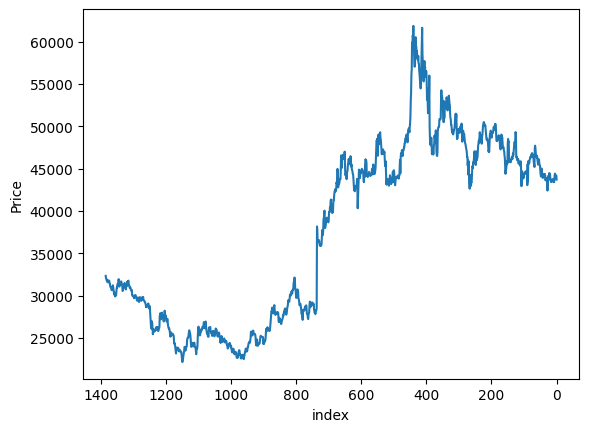

In [7]:
# Plot the price of steel for date
plt.plot(df.index,df['Price'])
plt.gca().invert_xaxis()
plt.xlabel("index")
plt.ylabel("Price")
plt.show()

In [8]:
# Check the change from the highest price to now
change = df['Price'].iloc[0]/max(df['Price'])
print(f"Current price to max is {change*100:.2f}%")

Current price to max is 70.66%


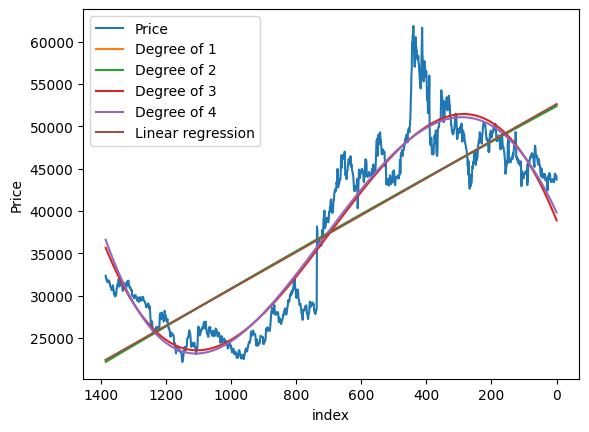

In [9]:
# Try adding a line to data
plt.plot(df.index,df['Price'],label="Price")
y = df['Price']
x = df.index
#Plot lines from different degree polynomials
a, b = np.polyfit(x,y,1)
plt.plot(x,a*x+b,label="Degree of 1")

a, b, c = np.polyfit(x,y,2)
plt.plot(x,a*x**2+b*x+c,label="Degree of 2")

a, b, c, d = np.polyfit(x,y,3)
plt.plot(x,a*x**3+b*x**2+c*x+d,label="Degree of 3")

a, b, c, d, e = np.polyfit(x,y,4)
plt.plot(x,a*x**4+b*x**3+c*x**2+d*x+e,label="Degree of 4")

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * np.array(x) + intercept, label='Linear regression')

plt.legend()
plt.gca().invert_xaxis()
plt.xlabel("index")
plt.ylabel("Price")
plt.show()

In [10]:
# Polynomial degree of 3 is best
a, b, c, d = np.polyfit(x,y,3)
print(f"a={a}")
print(f"b={b}")
print(f"c={c}")
print(f"d={d}")

a=0.0001017764830857682
b=-0.2121475711425971
c=96.258754051812
d=38903.30037839868


In [11]:
#Format data to have data as index
dfDate = df
dfDate.index = pd.to_datetime(df['Date'],format='%m/%d/%Y')
dfDate = dfDate.drop(columns=['Date'])
print(dfDate)

              Price      Open      High       Low Change %
Date                                                      
2023-12-26  43720.0  43840.00  43840.00  43610.00   -1.11%
2023-12-22  44210.0  44080.00  44250.00  44000.00    0.23%
2023-12-21  44110.0  44110.00  44160.00  44080.00    0.25%
2023-12-20  44000.0  44000.00  44000.00  44000.00    0.00%
2023-12-19  44000.0  44000.00  44000.00  44000.00   -0.95%
...             ...       ...       ...       ...      ...
2015-01-07  31700.0  31700.00  31700.00  31700.00   -0.35%
2015-01-06  31810.0  31810.00  31810.00  31810.00   -0.50%
2015-01-05  31970.0  31970.00  31970.00  31970.00   -0.22%
2015-01-02  32040.0  32040.00  32040.00  32040.00   -0.96%
2015-01-01  32350.0  32350.00  32350.00  32350.00   -0.03%

[1386 rows x 5 columns]


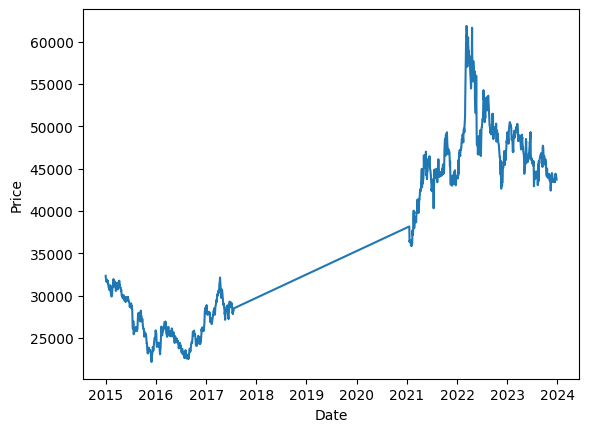

In [12]:
plt.plot(dfDate.index, dfDate['Price'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [13]:
# Values are missing on the straigth line. Change data to start from 2021
dfDate = dfDate[df.index > pd.to_datetime("2021-01-01", format="%Y-%m-%d")]
print(dfDate)

              Price      Open      High       Low Change %
Date                                                      
2023-12-26  43720.0  43840.00  43840.00  43610.00   -1.11%
2023-12-22  44210.0  44080.00  44250.00  44000.00    0.23%
2023-12-21  44110.0  44110.00  44160.00  44080.00    0.25%
2023-12-20  44000.0  44000.00  44000.00  44000.00    0.00%
2023-12-19  44000.0  44000.00  44000.00  44000.00   -0.95%
...             ...       ...       ...       ...      ...
2021-01-22  36410.0  36300.00  36740.00  36080.00   -0.25%
2021-01-21  36500.0  36500.00  36900.00  36200.00    0.36%
2021-01-20  36370.0  37700.00  37830.00  36250.00   -3.66%
2021-01-19  37750.0  38010.00  38020.00  37600.00   -1.13%
2021-01-18  38180.0  38400.00  38450.00  37940.00   33.96%

[737 rows x 5 columns]


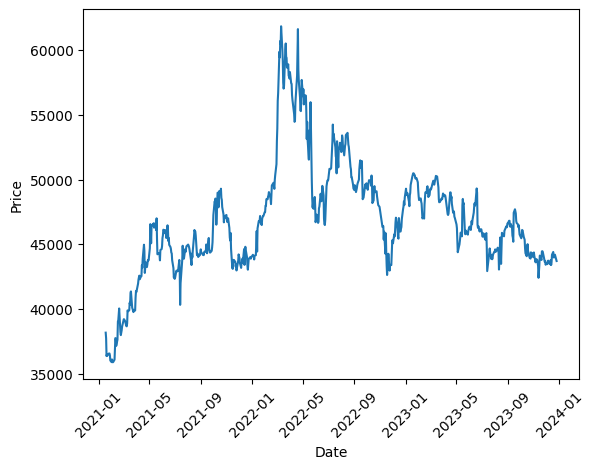

In [14]:
plt.plot(dfDate.index, dfDate['Price'])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [15]:
#TRy to fix the problem of having wrong data in prediction
df = df.iloc[::-1]
dfDate = df
dfDate.index = pd.to_datetime(df['Date'],format='%m/%d/%Y')
dfDate = dfDate[df.index > pd.to_datetime("2021-01-01", format="%Y-%m-%d")]

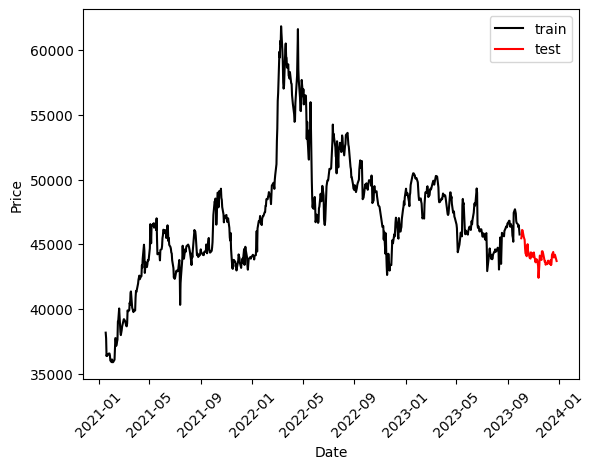

In [16]:
# Divide into train and test sets
train = dfDate[dfDate.index < pd.to_datetime("2023-10-01", format="%Y-%m-%d")]
test = dfDate[dfDate.index >= pd.to_datetime("2023-10-01", format="%Y-%m-%d")]
plt.plot(train.index,train['Price'], label="train", color="black")
plt.plot(test.index,test['Price'], label="test", color="red")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [17]:
# Forecasting with ARMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['Price']
modelARMA = SARIMAX(y, order = (1,0,1))
modelARMA = modelARMA.fit()

yPred = modelARMA.get_forecast(len(test.index))
yPredDf = yPred.conf_int(alpha = 0.05)
yPredDf["Predictions"] = modelARMA.predict(start = yPredDf.index[0], end = yPredDf.index[-1])
yPredDf.index = test.index
predictions = yPredDf["Predictions"]

             lower Price   upper Price   Predictions
Date                                                
2023-10-03  44265.032742  47275.171104  45770.101923
2023-10-04  43654.378649  47871.534137  45762.956393
2023-10-05  43181.654627  48329.969331  45755.811979
2023-10-06  42781.213311  48716.124048  45748.668680
2023-10-09  42427.221713  49055.831278  45741.526496
2023-10-10  42106.333503  49362.437351  45734.385427
2023-10-11  41810.585507  49643.905440  45727.245473
2023-10-12  41534.773912  49905.439356  45720.106634
2023-10-13  41275.276369  50150.661450  45712.968909
2023-10-16  41029.451138  50382.213460  45705.832299
2023-10-17  40795.301321  50602.092284  45698.696803
2023-10-18  40571.273878  50811.850963  45691.562421
2023-10-19  40356.132661  51012.725643  45684.429152
2023-10-20  40148.874647  51205.719347  45677.296997
2023-10-23  39948.672662  51391.659250  45670.165956
2023-10-25  39754.835014  51571.237042  45663.036028
2023-10-26  39566.776322  51745.038104  45655.

C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is avail

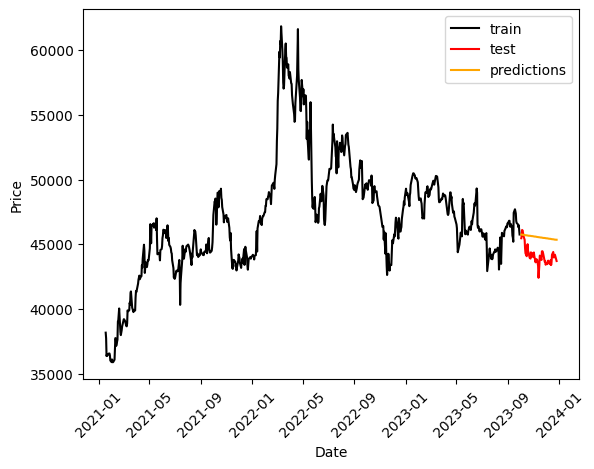

In [19]:
plt.plot(train.index,train['Price'], label="train", color="black")

plt.plot(test.index,test['Price'], label="test", color="red")

plt.plot(predictions, color = "orange", label = "predictions")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [20]:
# Count RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Price"].values,yPredDf["Predictions"]))
print(f"RMSE: {rmse:.2f}")

RMSE: 1532.58


In [21]:
# Find best prediction values
y = train['Price']
best = 1000
values = (0,0,0)
for a in range(5):
    for b in range(5):
        for c in range(5):
            modelARMA = SARIMAX(y, order = (a,b,c))
            modelARMA = modelARMA.fit()
            
            yPred = modelARMA.get_forecast(len(test.index))
            yPredDf = yPred.conf_int(alpha = 0.05)
            yPredDf["Predictions"] = modelARMA.predict(start = yPredDf.index[0], end = yPredDf.index[-1])
            rmse = np.sqrt(mean_squared_error(test["Price"].values,yPredDf["Predictions"]))
            if rmse<best:
                best = rmse
                values = (a,b,c)

print(f"RMSE: {rmse:.2f}")
print(values)

C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

RMSE: 117770.51
(1, 3, 3)


C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results wi

C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\danib\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction 

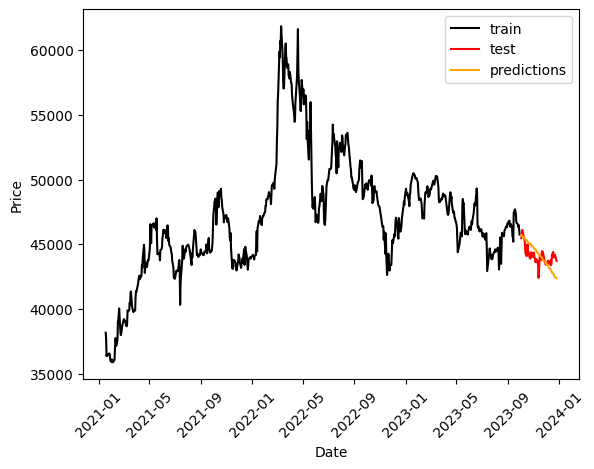

RMSE: 795.06


In [27]:
modelARMA = SARIMAX(y, order = (1,3,3))
modelARMA = modelARMA.fit()

yPred = modelARMA.get_forecast(len(test.index))
yPredDf = yPred.conf_int(alpha = 0.05)
yPredDf["Predictions"] = modelARMA.predict(start = yPredDf.index[0], end = yPredDf.index[-1])
yPredDf.index = test.index
predictions = yPredDf["Predictions"]

plt.plot(train.index,train['Price'], label="train", color="black")

plt.plot(test.index,test['Price'], label="test", color="red")

plt.plot(predictions, color = "orange", label = "predictions")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

rmse = np.sqrt(mean_squared_error(test["Price"].values,yPredDf["Predictions"]))
print(f"RMSE: {rmse:.2f}")